###Assignment Extra Class 4 - Gradient Boosted Trees & Ensemble Models and Deep Learning <br>
### Nama : Chintia Hildayanti
### Data Science 26

In [ ]:
pip install mrmr_selection

### Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mrmr import mrmr_classif
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

###Objective:  <br>
Membangun model prediksi yang akurat untuk menentukan harga rumah berdasarkan fitur-fitur yang tersedia dalam dataset, dengan menggunakan teknik Gradient Boosted Trees Regression.


### Load Dataset

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###About The Dataset <br>

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.<br>
MSSubClass: The building class<br>
MSZoning: The general zoning classification<br>
LotFrontage: Linear feet of street connected to property<br>
LotArea: Lot size in square feet<br>
Street: Type of road access<br>
Alley: Type of alley access<br>
LotShape: General shape of property<br>
LandContour: Flatness of the property<br>
Utilities: Type of utilities available<br>
LotConfig: Lot configuration<br>
LandSlope: Slope of property<br>
Neighborhood: Physical locations within Ames city limits<br>
Condition1: Proximity to main road or railroad<br>
Condition2: Proximity to main road or railroad (if a second is present)<br>
BldgType: Type of dwelling<br>
HouseStyle: Style of dwelling<br>
OverallQual: Overall material and finish quality<br>
OverallCond: Overall condition rating<br>
YearBuilt: Original construction date<br>
YearRemodAdd: Remodel date<br>
RoofStyle: Type of roof<br>
RoofMatl: Roof material<br>
Exterior1st: Exterior covering on house<br>
Exterior2nd: Exterior covering on house (if more than one material)<br>
MasVnrType: Masonry veneer type<br>
MasVnrArea: Masonry veneer area in square feet<br>
ExterQual: Exterior material quality<br>
ExterCond: Present condition of the material on the exterior<br>
Foundation: Type of foundation<br>
BsmtQual: Height of the basement<br>
BsmtCond: General condition of the basement<br>
BsmtExposure: Walkout or garden level basement walls<br>
BsmtFinType1: Quality of basement finished area<br>
BsmtFinSF1: Type 1 finished square feet<br>
BsmtFinType2: Quality of second finished area (if present)<br>
BsmtFinSF2: Type 2 finished square feet<br>
BsmtUnfSF: Unfinished square feet of basement area<br>
TotalBsmtSF: Total square feet of basement area<br>
Heating: Type of heating<br>
HeatingQC: Heating quality and condition<br>
CentralAir: Central air conditioning<br>
Electrical: Electrical system<br>
1stFlrSF: First Floor square feet<br>
2ndFlrSF: Second floor square feet<br>
LowQualFinSF: Low quality finished square feet (all floors)<br>
GrLivArea: Above grade (ground) living area square feet<br>
BsmtFullBath: Basement full bathrooms<br>
BsmtHalfBath: Basement half bathrooms<br>
FullBath: Full bathrooms above grade<br>
HalfBath: Half baths above grade<br>
Bedroom: Number of bedrooms above basement level<br>
Kitchen: Number of kitchens<br>
KitchenQual: Kitchen quality<br>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br>
Functional: Home functionality rating<br>
Fireplaces: Number of fireplaces<br>
FireplaceQu: Fireplace quality<br>
GarageType: Garage location<br>
GarageYrBlt: Year garage was built<br>
GarageFinish: Interior finish of the garage<br>
GarageCars: Size of garage in car capacity<br>
GarageArea: Size of garage in square feet<br>
GarageQual: Garage quality<br>
GarageCond: Garage condition<br>
PavedDrive: Paved driveway<br>
WoodDeckSF: Wood deck area in square feet<br>
OpenPorchSF: Open porch area in square feet<br>
EnclosedPorch: Enclosed porch area in square feet<br>
3SsnPorch: Three season porch area in square feet<br>
ScreenPorch: Screen porch area in square feet<br>
PoolArea: Pool area in square feet<br>
PoolQC: Pool quality<br>
Fence: Fence quality<br>
MiscFeature: Miscellaneous feature not covered in other categories<br>
MiscVal: $Value of miscellaneous feature<br>
MoSold: Month Sold<br>
YrSold: Year Sold<br>
SaleType: Type of sale<br>
SaleCondition: Condition of sale<br>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Cleaning

In [ ]:
# menghapus kolom yang mengandung banyak missing value > 6%

columns_to_drop = ['Id','LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

df = df.drop(columns=columns_to_drop)

In [ ]:
# Menampilkan kolom yang memiliki missing values, termasuk yang tidak ada missing values

missing_values = df.isnull().sum()

missing_values_sorted = missing_values.sort_values(ascending=False)
missing_values_sorted

,0
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81
GarageCond,81
...,...
BsmtUnfSF,0
TotalBsmtSF,0
Heating,0
MSZoning,0


In [ ]:
# menghapus baris yang memiliki missing value <6%

df = df.dropna()

In [ ]:
# mengecek kembali data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotArea        1338 non-null   int64  
 3   Street         1338 non-null   object 
 4   LotShape       1338 non-null   object 
 5   LandContour    1338 non-null   object 
 6   Utilities      1338 non-null   object 
 7   LotConfig      1338 non-null   object 
 8   LandSlope      1338 non-null   object 
 9   Neighborhood   1338 non-null   object 
 10  Condition1     1338 non-null   object 
 11  Condition2     1338 non-null   object 
 12  BldgType       1338 non-null   object 
 13  HouseStyle     1338 non-null   object 
 14  OverallQual    1338 non-null   int64  
 15  OverallCond    1338 non-null   int64  
 16  YearBuilt      1338 non-null   int64  
 17  YearRemodAdd   1338 non-null   int64  
 18  RoofStyle    

In [ ]:
# mengecek nilai duplikat

df.duplicated().sum()

0

### Exploratory Data Analysis

In [ ]:
# membagi kolom kategorik dan numerik

cats = df.select_dtypes(include=object).columns.to_list()
nums = df.select_dtypes(exclude=object).columns.to_list()

In [ ]:
# statistik summary kolom numerik

df[nums].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,56.136024,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,582.494768,...,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511
std,41.252576,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,439.950528,...,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668
min,20.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,7744.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,9600.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,489.000000,...,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,168500.000000
75%,70.000000,11760.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,815.750000,...,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,220000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# statistik summary kolom kategorik

df[cats].describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,...,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1066,1333,829,1206,1337,957,1265,209,1162,1324,...,1242,650,1254,852,580,1270,1287,1257,1158,1104


In [ ]:
# statistik summary kolom taget value

df['SalePrice'].describe()

,SalePrice
count,1338.000000
mean,186761.782511
std,78913.847668
min,35311.000000
25%,135000.000000
50%,168500.000000
75%,220000.000000
max,755000.000000


<Axes: ylabel='SalePrice'>

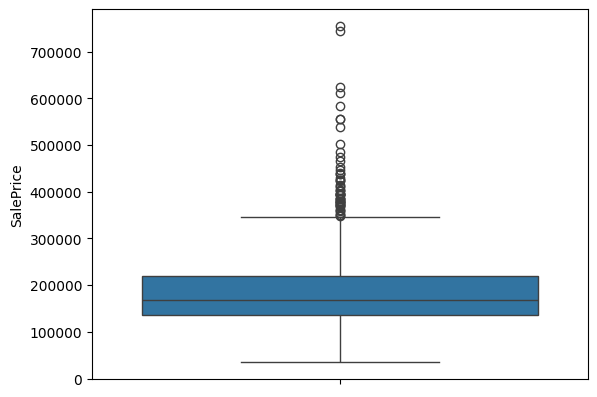

In [ ]:
# mendeteksi outlier

sns.boxplot(df['SalePrice'])

In [ ]:
# mengambil data tanpa outlier (<600000)

df= df[df['SalePrice'] < 600000]

<Axes: xlabel='SalePrice', ylabel='Density'>

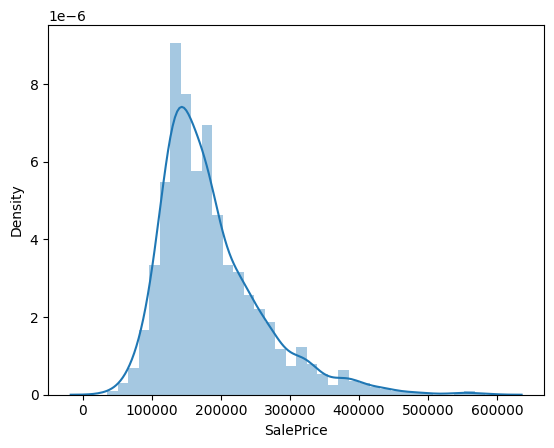

In [ ]:
# melihat distribusi data

sns.distplot(df['SalePrice'])

###Feature Engineering

In [ ]:
# melakukan one hot encoding pada kolom numerik

cats_2 = df.select_dtypes(include=object).columns.to_list()
df_encoded = pd.get_dummies(df, columns=cats_2, dtype = int, drop_first=True)

In [ ]:
# melihat hasil one hot

df_encoded

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,0,0,0,1,0,0,0,1,0
1456,20,13175,6,6,1978,1988,119.0,790,163,589,...,0,0,0,0,1,0,0,0,1,0
1457,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,0,0,0,1,0,0,0,1,0
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1334 entries, 0 to 1459
Columns: 224 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(222)
memory usage: 2.3 MB


###Feature Scalling

In [ ]:
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
df_new = pd.DataFrame(data = X_std, columns = X.columns)
df_new.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.093143,-0.215507,0.602999,-0.553756,1.016418,0.855638,0.489605,0.542230,-0.296738,-0.983393,...,-0.054841,-0.054841,-0.308607,-0.02739,0.393673,-0.02739,-0.07263,-0.123372,0.458831,-0.312957
1,-0.875692,-0.104074,-0.159466,2.226835,0.103080,-0.474230,-0.603505,1.142465,-0.296738,-0.678896,...,-0.054841,-0.054841,-0.308607,-0.02739,0.393673,-0.02739,-0.07263,-0.123372,0.458831,-0.312957
2,0.093143,0.055808,0.602999,-0.553756,0.948763,0.806384,0.299984,0.056747,-0.296738,-0.338041,...,-0.054841,-0.054841,-0.308607,-0.02739,0.393673,-0.02739,-0.07263,-0.123372,0.458831,-0.312957
3,0.335352,-0.108919,0.602999,-0.553756,-1.960388,-0.769757,-0.603505,-0.539074,-0.296738,-0.097170,...,-0.054841,-0.054841,-0.308607,-0.02739,0.393673,-0.02739,-0.07263,-0.123372,-2.179449,-0.312957
4,0.093143,0.347472,1.365464,-0.553756,0.914936,0.707875,1.348478,0.429686,-0.296738,-0.210788,...,-0.054841,-0.054841,-0.308607,-0.02739,0.393673,-0.02739,-0.07263,-0.123372,0.458831,-0.312957


### Split Dataset

In [ ]:
# memisahkan data train & test

feature = df_new
target = df_encoded['SalePrice']

ftr_train, ftr_test, tg_train,tg_test = train_test_split(feature,target,
                                                test_size = 0.20,
                                                random_state = 42)

### Feature Selection

In [ ]:
#menyelaraskan indeks ftr_train dan tg_train

ftr_train, tg_train = ftr_train.align(tg_train, axis=0, join='inner')

# memilih fitur penting

list_keep = mrmr_classif(X=ftr_train,y=tg_train, K=20)

100%|██████████| 20/20 [00:04<00:00,  4.43it/s]


In [ ]:
# menyimpan hasil feature selection

ftr_train_new = ftr_train[list_keep]
ftr_test_new  = ftr_test[list_keep]

### Model Training

####Gradient Boosting Regressor

In [ ]:
# training model Gradient Boosting Regressor

gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(ftr_train_new, tg_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
# menyiapkan hasil prediksi pada data train

feature_train = ftr_train_new.to_numpy()
target_predict_train = gb_regressor.predict(feature_train)

target_train = tg_train.to_numpy()

In [ ]:
# evaluasi model Gradient Boosting Regressor pada data train

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(target_train, target_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(target_train, target_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(target_train, target_predict_train)))

RMSE for training data is 74094.97762974804
MAE for training data is 54722.14996925594
MAPE for training data is 0.3174397922913593


In [ ]:
# menyiapkan hasil prediksi pada data test

feature_test = ftr_test_new.to_numpy()
target_predict_test = gb_regressor.predict(feature_test)

target_test = tg_test.to_numpy()

In [ ]:
# evaluasi model Gradient Boosting Regressor pada data test

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(target_test, target_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(target_test, target_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(target_test, target_predict_test)))

RMSE for testing data is 72397.74510431243
MAE for testing data is 55158.69328625072
MAPE for testing data is 0.38704862963214676


####XGBRegressor (XGBoost)

In [ ]:
# training model XGBRegressor (XGBoost)

xgb_regressor = xgb.XGBRegressor(random_state=42)
xgb_regressor.fit(ftr_train_new, tg_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# evaluasi model XGBRegressor (XGBoost) pada data train

xgb_target_predict_train = xgb_regressor.predict(feature_train)

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(target_train, xgb_target_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(target_train, xgb_target_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(target_train, xgb_target_predict_train)))

RMSE for training data is 74080.7740532167
MAE for training data is 54584.33924124357
MAPE for training data is 0.31662717113037836


In [ ]:
# presentase perbandingan hasil rmse dengan target value

74080.7740532167/755000.000000*100

9.812023053406184

In [ ]:
# evaluasi model XGBRegressor (XGBoost) pada data test

xgb_target_predict_test = xgb_regressor.predict(feature_test)

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(target_test, xgb_target_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(target_test, xgb_target_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(target_test, xgb_target_predict_test)))

RMSE for testing data is 72789.45772225317
MAE for testing data is 55233.9533590824
MAPE for testing data is 0.3870277579577567


Memilih model terbaik <br>
XGBRegressor (XGBoost) adalah model terbaik karena memiliki rmse yang lebih kecil dari model lainnya yaitu 74080.7740532167 <br>

Interpretasi :<br>
model ini cukup baik karena memiliki rmse 9% dari nilai target <br>

nilai mape sebesar 0.3870277579577567 berarti 62% training data terprediksi dengan baik <br>

kedua model cukup baik karena memiliki nilai rmse yang kecil dan hasil prediksi training dan testing tidak terlalu jauh berbeda maka model tidak over fitting.


### Hyperparameter Tunning

In [ ]:
# melakukan hyperparameter tunning pada model XGBRegressor (XGBoost)

parameters_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

xgb_regressor_gridcv = GridSearchCV(xgb_regressor, parameters_grid, cv=5,
                                scoring='neg_root_mean_squared_error')
xgb_regressor_gridcv.fit(ftr_train_new, tg_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_root_mean_squared_error')

In [ ]:
# melihat hasil hyperparameter tunning

retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(xgb_regressor_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",-76444.003463,3
1,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",-77257.765807,4
2,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",-77484.598986,7
3,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",-76414.442005,2
4,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",-77306.326398,5
5,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",-77755.541994,9
6,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",-76382.388661,1
7,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",-77341.941563,6
8,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",-77824.751380,11
9,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",-77488.388223,8


In [ ]:
# melihat best estimator

xgb_regressor_gridcv.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

model terbaik adalah dengan hyperparameter : <br>
learning_rate=0.01 <br>
n_estimators=100 <br>
max_depth=7 <br>

In [ ]:
# evaluasi model XGBRegressor (XGBoost) dengan hyperparameter tunning pada data train

xgbgridcv_target_predict_train = xgb_regressor_gridcv.predict(feature_train)

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(target_train, gbgridcv_target_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(target_train, gbgridcv_target_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(target_train, gbgridcv_target_predict_train)))

RMSE for training data is 74376.78925212237
MAE for training data is 55237.3548182776
MAPE for training data is 0.320236010698884


In [ ]:
# presentase perbandingan hasil rmse dengan target value

74376.78925212237/755000.000000*100

9.851230364519518

In [ ]:
# evaluasi model XGBRegressor (XGBoost) dengan hyperparameter tunning pada data test

xgbgridcv_target_predict_test = xgb_regressor.predict(feature_test)

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(target_test, gbgridcv_target_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(target_test, gbgridcv_target_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(target_test, gbgridcv_target_predict_test)))

RMSE for testing data is 72789.45772225317
MAE for testing data is 55233.9533590824
MAPE for testing data is 0.3870277579577567


Interpretasi : <br>
hasil model XGBRegressor dengan hyperparameter tidak jauh berbeda dengan model XGBRegressor tanpa hyperparameter, yaitu rmse sebesar 74376 pada training data dan 72789 pada test data tapi angka tersebut masih lebih besar dari pada model XGBRegressor tanpa hyperparameter. jadi saya memilih XGBRegressor tanpa hyperparameter sebagai model terbaik karena memiliki rmse paling kecil